# First test on Signal functions in scipy

*This notebook is still under construction*

#### Initialization

In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

### First system

The first system is a first-order system that is defined via the transfer function model.
The model is:
$$
H(s) = \frac{1}{s+1}
$$
A Bode-plot is generated to analyse the frequency response.

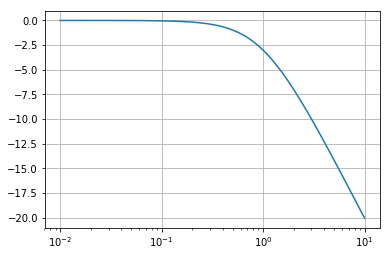

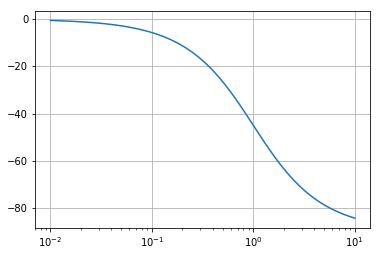

In [2]:
sys = signal.TransferFunction([1], [1, 1])
w, mag, phase = sys.bode()

plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.grid(True)
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.grid(True)
plt.show()

### System 2

The second system is given by the State-space matrices:
$$
A = \left(\matrix{-1 & 1 \\ -1 & 2}\right), \; B = \left(\matrix{0 \\ 1}\right), \; C = \left(\matrix{1 & 1}\right) \; \text{and} \; D = \left(0\right)
$$
The corresponding transfer function is:
$$
H(s) = \frac{1}{s^2 - s - 1}
$$


In [4]:
a = np.array([[-1, 1], [-1, 2]])
b = np.array([[0], [1]])
c = np.array([[1, 1]])
d = np.array([[0]])

sys2 = signal.StateSpace(a, b, c, d)
print("System 2 in State-Space is: ",sys2)
systf2=signal.StateSpace.to_tf(sys2)
print("System 2 in transfer function is: ",systf2)

System 2 in State-Space is:  StateSpaceContinuous(
array([[-1,  1],
       [-1,  2]]),
array([[0],
       [1]]),
array([[1, 1]]),
array([[0]]),
dt: None
)
System 2 in transfer function is:  TransferFunctionContinuous(
array([1.]),
array([ 1., -1., -1.]),
dt: None
)


In [5]:
sys3=signal.ZerosPolesGain([1, 2], [3, 4], 5)
print("System 3 in zero-pole-gain is: ",sys3)
systf3=signal.ZerosPolesGain.to_tf(sys3)
print("System 3 in transfer function is: ",systf3)

System 3 in zero-pole-gain is:  ZerosPolesGainContinuous(
array([1, 2]),
array([3, 4]),
5,
dt: None
)
System 3 in transfer function is:  TransferFunctionContinuous(
array([  5., -15.,  10.]),
array([ 1., -7., 12.]),
dt: None
)


### System 4 with a step-response and a impulse-response

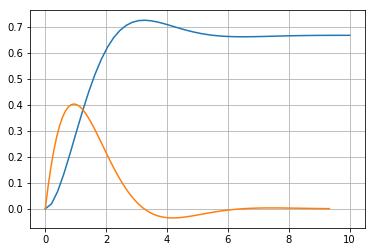

In [6]:
sys4 = signal.lti([[-1., 1.], [-1., -0.5]], [[0.], [1.]], [[1., 0.]], 0.)
t = np.linspace(0, 10)
u = np.ones_like(t)
tout, y, x = signal.lsim(sys4, u, t)
plt.plot(t, y)
plt.grid(True)
tout2, y2 = signal.impulse(sys4)
plt.plot(tout2,y2)
plt.grid(True)
plt.show()

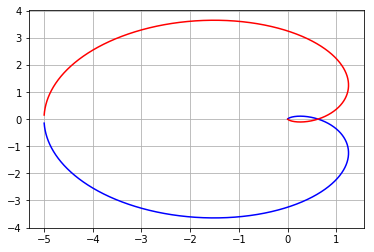

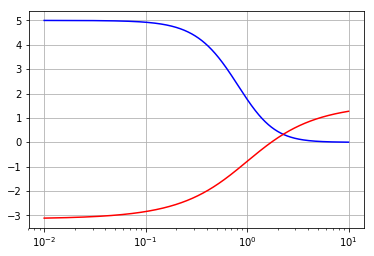

In [7]:
sys5 = signal.ZerosPolesGain([], [1, 1, 1], [5])
w, H = signal.freqresp(sys5)

plt.figure()
plt.plot(H.real, H.imag, "b")
plt.plot(H.real, -H.imag, "r")
plt.grid(True)
plt.show()

plt.figure()
plt.semilogx(w,np.abs(H),"b")
plt.semilogx(w,np.angle(H),"r")
plt.grid(True)
plt.show()